Disclaimer: ChatGPT was used in this assignment.
______________

In [13]:
import pandas as pd
import plotly.express as px

### Introduction 

This project focuses on Radio station development in the U.S between 1930 to 1950. Radio's development in the U.S was initally scientific and technological with a focus on military use for communication. Navy ships would be the first testing ground for radio, with an attempt in 1917 to broadcast a speech from Woodrow Wilson to soldiers on the Atlantic. Nobody heard President Wilson because he was too far from the mic. After the 1920s, amateur radio operators arose in the U.S, leading to a profileration of radio signals that would compete with others for broadcast frequencies. The lack of licensing and authorization for radio stations. Beginning in the Great Depression the U.S government established a licensing process to approve and regulate radio stations through the **Communications Act of 1934**. 

- Does 250-watter mean large regional radio range or local only?

- song-and-spot-announcement mayhap?

Historical scholarship of the U.S radio industry largely falls into two camps, with a secret third camp of scholarly writing that I found 24 hours before the Wednesday due date. One nature of scholarly writing focuses on radio's development from 1930-1950 in creating commercial radio. J. Fred Macdonald writes in *Don't Touch that Dial!* that Radio programming in this era started with now-standard playback of music for a nation of music listeners. A variety of shows were created such as soap opera and advice show *Ma Perkins*, comedy show *Jack Benny Program* and *Lone Ranger*, a western. Ma Perkin's was created by Procter and Gamble to sell their Oxydol laundry detergent to housewives. Shows like these commonly had sponsors vying for airtime on popular shows, another commercial aspect of radio listening in the United States. Scholars referred to this as the record-and-spot-announcement, the idea that a radio or television program includes airtime for brief announcements like an advertisment. For instance, Before someone in 1950 could get their version of *ABC Nightly News* to find out current events, they would have to listen to the show's sponsors. As a result, [showmanship and personality](https://youtu.be/5P2yTfJ7nGI?feature=shared) of radio announcers was key in fostering commercial radio's national audience and popularity, so listeners wouldn't get bored.

The later scholarship like that of sociologist Rudi Volti elaborates on the particular difficulties the FCC had in using it's limited regulatory powers.  Rising corporate giants like RCA and NBC heavily influenced the FCC because they would lobby and even offer executive positions to FCC commissioners and employees. But some other modern sources on radio history show nuance to this. (2020 book) argues that colleges and educational institutions had a role in the start of American Radio Broadcasting. In 1920, Union College in Schenectady New York started the first campus radio station in the United States. The caveat to this was nationally many areas lacked the kind of educational broadcasting found at colleges, like shows from experts on international affairs or agricultural information. Most people would commonly get their news from radio programming produced by the big three Network affilates: ABC, NBC, or CBS. By 1950 the three had created a nationally syndicated network of affilate radio stations, and were soon looking to expand to color television.

The last of the scholarly writing on the topic arises from J.W Lewis writing in 1947. Lewis argued that educational broadcasting began a transformation, making it more in-line with the programming of commercial radio stations. In Colorado and Wyoming radio was used to connect isolated communities with more educational programming that employed the "showmanship and personality" of standard national affilate radio. The Rocky Mountain Radio Council formed, experimenting with new program techniques and a large financial backing of non-profit foundations. This council would create and sell educational programming to rural and isolated radio stations across mountain states. The programming came from council members like the Denver Art Museum, the Denver Public Library, and numerous colleges including Colorado College.

My inital focus for this project was on the corporations behind radio. But as the data taken from the FCC's annual report on radio stations by state was visualized, it showed unexpected trends in per capita data of radio station distribution among U.S regions. Like why did Mountainous States such as Colorado and Way have substantial differences in per capita radio prevalance and coverage than most of the East Coast regions? Radio broadcasting and it's multi-genre programs, both commercial and non-commercial, led to the isolated Mountain States region of the U.S to become and also develop a cornerstone of radio broadcast in the U.S, public educational radio.

### Methodology/Data

### Main Analysis



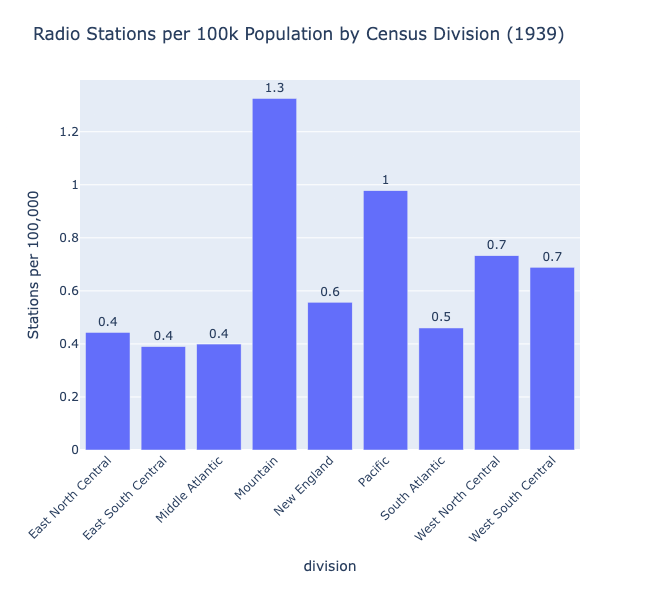

In [62]:
df1940=pd.read_csv('../data/processed/correct_dtypes_merged_fcc_census_1940.csv')
import pandas as pd
import plotly.express as px

# 1) Define the 9 Census divisions
division_map = {
    # New England
    'Connecticut': 'New England', 'Maine': 'New England',
    'Massachusetts': 'New England', 'New Hampshire': 'New England',
    'Rhode Island': 'New England', 'Vermont': 'New England',
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'New Jersey': 'Middle Atlantic',
    'Pennsylvania': 'Middle Atlantic',
    # East North Central
    'Illinois': 'East North Central', 'Indiana': 'East North Central',
    'Michigan': 'East North Central', 'Ohio': 'East North Central',
    'Wisconsin': 'East North Central',
    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central',
    'Minnesota': 'West North Central', 'Missouri': 'West North Central',
    'Nebraska': 'West North Central', 'North Dakota': 'West North Central',
    'South Dakota': 'West North Central',
    # South Atlantic
    'Delaware': 'South Atlantic', 'Florida': 'South Atlantic',
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic',
    'North Carolina': 'South Atlantic', 'South Carolina': 'South Atlantic',
    'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',
    'District of Columbia': 'South Atlantic',
    # East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central',
    'Mississippi': 'East South Central', 'Tennessee': 'East South Central',
    # West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central',
    'Oklahoma': 'West South Central', 'Texas': 'West South Central',
    # Mountain
    'Arizona': 'Mountain', 'Colorado': 'Mountain',
    'Idaho': 'Mountain', 'Montana': 'Mountain',
    'Nevada': 'Mountain', 'New Mexico': 'Mountain',
    'Utah': 'Mountain', 'Wyoming': 'Mountain',
    # Pacific
    'Alaska': 'Pacific', 'California': 'Pacific',
    'Hawaii': 'Pacific', 'Oregon': 'Pacific',
    'Washington': 'Pacific'
}

# 2) Assign divisions to your DataFrame (e.g. df1940 or df1950)
df1940['division'] = df1940['state'].map(division_map)

# 1) Group and sum both raw stations & population
region_rates = (
    df1940
    .groupby('division', as_index=False)
    .agg(
        total_stations=('total', 'sum'),
        population=('Population_1940', 'sum')
    )
)

# 2) Compute the per-100k rate at the regional level
region_rates['stations_per_100k'] = (
    region_rates['total_stations']
    / region_rates['population']
    * 100_000
)

# 3) Plot that
fig = px.bar(
    region_rates,
    x='division',
    y='stations_per_100k',
    title='Radio Stations per 100k Population by Census Division (1939)',
    labels={'stations_per_100k': 'Stations per 100,000'},
    text=region_rates['stations_per_100k'].round(1),
    height=600
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, margin={'b':150, 't':80},
                  uniformtext_minsize=8,
                  uniformtext_mode='hide'

                  
                 )
fig.show()

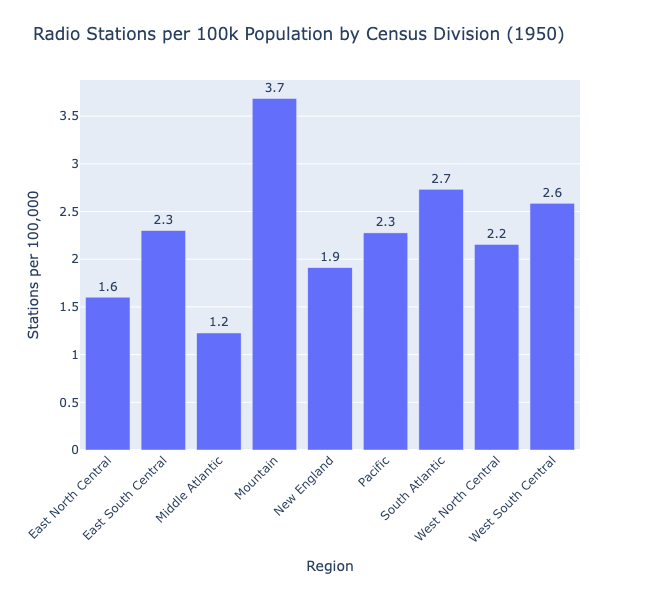

In [76]:

df1950= pd.read_csv('../data/processed/correct_dtypes_merged_fcc_census_1950.csv')
# 2) Assign divisions to your DataFrame (e.g. df1940 or df1950)
df1950['division'] = df1950['State'].map(division_map)


# 1) Group and sum both raw stations & population
region_rates = (
    df1950
    .groupby('division', as_index=False)
    .agg(
        total_stations=('total_radio', 'sum'),
        population=('Population_1950', 'sum')
    )
)

# 2) Compute the per-100k rate at the regional level
region_rates['stations_per_100k'] = (
    region_rates['total_stations']
    / region_rates['population']
    * 100_000
)

# 3) Plot that
fig = px.bar(
    region_rates,
    x='division',
    y='stations_per_100k',
    title='Radio Stations per 100k Population by Census Division (1950)',
    labels={'stations_per_100k': 'Stations per 100,000','division':'Region'},
    text=region_rates['stations_per_100k'].round(1),
    height=600
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, margin={'b':150, 't':80},
                  uniformtext_minsize=8,
                  uniformtext_mode='hide'

                  
                 )
fig.show()

### Bibliography
___

Lewis, Jack Weir. “Educational Radio Rides the Range.” Hollywood Quarterly 1, no. 3 (1946): 312–16. https://doi.org/10.2307/1209288.


